NanoVnaPlot - Read, plot and analyze the saved NANOVNA files (s1p, s2p) <br> 
<hr>
19-Feb-23   CBL  Original
<hr>
<ul>
<li> https://scikit-rf.readthedocs.io/en/latest/tutorials/Plotting.html </li>
<li> github associated with this: https://github.com/scikit-rf/ </li>
<li> https://scikit-rf.readthedocs.io/en/latest/tutorials/Networks.html </li>
</ul>

In [1]:
import numpy as np               # numpy is all the numerical stuff
import matplotlib.pyplot as plt  # I happen to always include this so I can make plots
import skrf as rf                # this is part of the overall SCIKIT-RF
from skrf import Network         # How do I create the network?
from skrf import Frequency       # for making up an array of frequency values
from skrf import plotting        # Plotting
import math                      # Additional math stuff. not always used. 

In [2]:
def Inductance(F,Z):
    """
    @param F - frequency in Hz
    @param Z - imarinary impedance in ohms
    """
    omega = 2.0*np.pi*F
    Z_imag = np.imag(Z)
    X = Z_imag.reshape(Z_imag.size)
    L = np.divide(X, omega)
    return L

In [3]:
def Capacitance(F,Z):
    """
    @param F - frequency in Hz
    @param Z - impedance in ohms
    """
    C = 1.0/(2.0*np.pi*F*np.imag(Z))
    return C

1-Port Network: '50ohmResistive',  50000.0-900000000.0 Hz, 101 pts, z0=[50.+0.j]


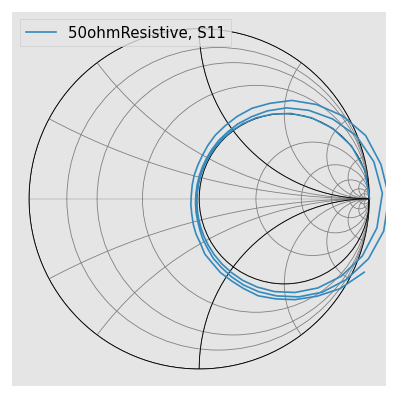

In [4]:
# Load and plot the SMA 50ohm terminator provided with the Nanovna. 
Terminator = Network('Antenna/50ohmResistive.s1p')
print(Terminator)
rf.stylely()
Terminator.plot_s_smith()

1-Port Network: 'HFAntenna',  100000.0-30000000.0 Hz, 101 pts, z0=[50.+0.j]


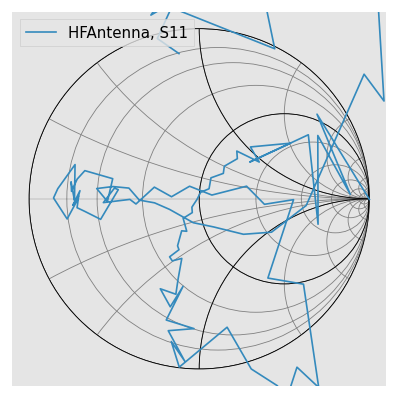

In [5]:
# Now look at the HF Longwire I have installed. 
Longwire = Network('Antenna/HFAntenna.s1p')
print(Longwire)
Longwire.plot_s_smith()

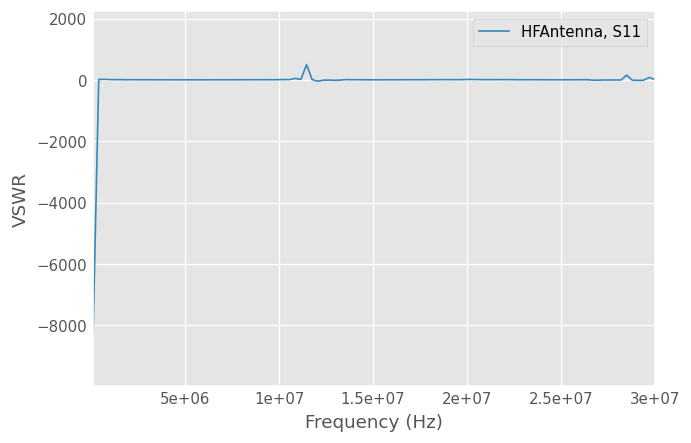

In [6]:
Longwire.plot_s_vswr()

1-Port Network: 'discone',  50000000.0-900000000.0 Hz, 101 pts, z0=[50.+0.j]


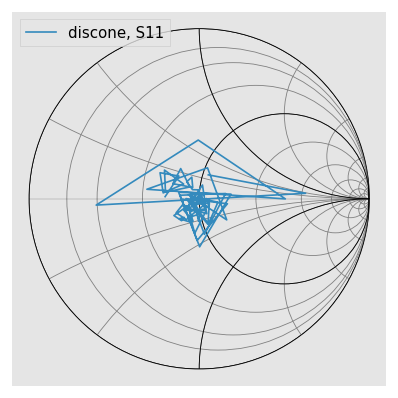

In [7]:
# Ok, now the discone antenna
Discone = Network('Antenna/discone.s1p')
print(Discone)
Discone.plot_s_smith()

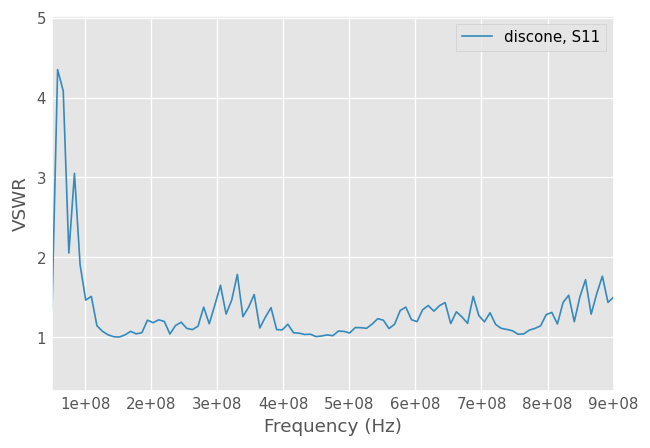

In [8]:
Discone.plot_s_vswr()

1-Port Network: '50OhmReference',  500000.0-20000000.0 Hz, 101 pts, z0=[50.+0.j]


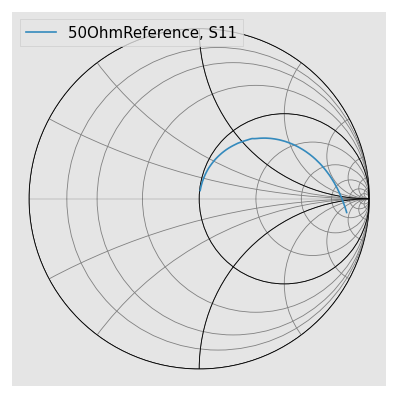

In [9]:
# Coax to 50ohm wire wound resistor
Resistor = Network('Antenna/50OhmReference.s1p')
print(Resistor)
Resistor.plot_s_smith()

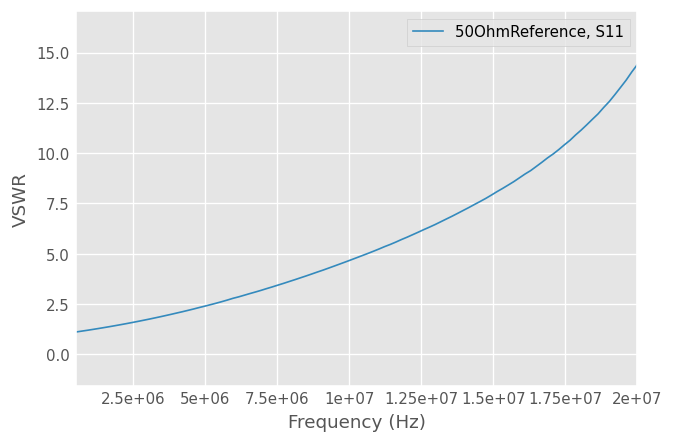

In [10]:
Resistor.plot_s_vswr()

The small loop is composed of 

1-Port Network: 'LoopAntenna2_withTransformer',  500000.0-20000000.0 Hz, 101 pts, z0=[50.+0.j]


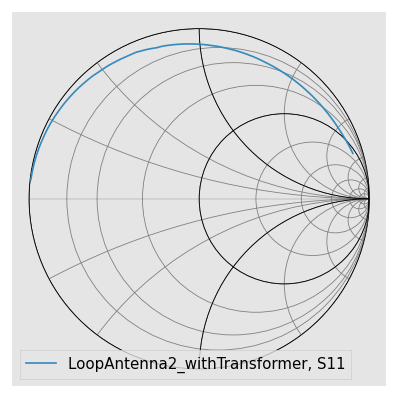

In [11]:
# Small loop with coupling and capacitor
Loop2A = Network('Antenna/LoopAntenna2_withTransformer.s1p')
print(Loop2A)
Loop2A.plot_s_smith()

Go direct to the antenna Parameters read off nanovna interface are:
<table>
    <tr> 
        <th> Parameter </th>
        <th> 0.5MHz </th>
        <th> 10.25MHz </th>
        <th> 20.0MHz</th>
    </tr>
    <tr>
        <td> Z </td>
        <td> 0.118 - 29.7j </td>
        <td> 4.48 + 23.59j </td>
        <td> 15.3 + 62.7j </td>
    </tr>
    <tr> 
        <td> Series L </td>
        <td> -9.94nH </td>
        <td> 458.23nH </td>
        <td> 498nH <td>
    </tr>
    <tr>
        <td> Series C </td> 
        <td> 10.73nF </td>
        <td> -526.15pF </td> 
        <td> -126.98pF <td>
    </tr>
    <tr>
        <td> Parallel R</td>
        <td> 4.7k</td>
        <td> 184.2</td>
        <td> 273.63</td>
    </tr>
    <tr>
        <td> Parallel X </td>
        <td> 10.72nF</td>
        <td> 468nH</td>
        <td> 528nH</td>
    </tr>
</table>

In [71]:
# See if we can reproduce the above.
n = len(Loop2A.f)
#index = np.rint(n/2).astype(int)
index = 0
print(index)
f = Loop2A.f[index]
Z = Loop2A.z[index]
L = Loop2A.z_im[index]/(2.0*np.pi*f)
C = 1.0/(2.0*np.pi*f*Loop2A.z_im[index])
print(f,' ', Z, ' Series L:',  L, ' Series C:', C, ' L other:', Inductance(f,Z) )

0
500000.0   [[0.10589821+2.83699413j]]  Series L: [[9.0304328e-07]]  Series C: [[1.12199698e-07]]  L other: [[9.0304328e-07]]


So, there is a pretty big difference between what is gotten out of nanovna_saver and what we get here through calculation.  At 500kHz, the resistive value is about right, the reactive part is off by an order of magnitude. Why? <br> 
https://www.rfcafe.com/references/electrical/s-h-y-z.htm <br>
http://www.pilloud.net/op_web/one_port.pdf <br>

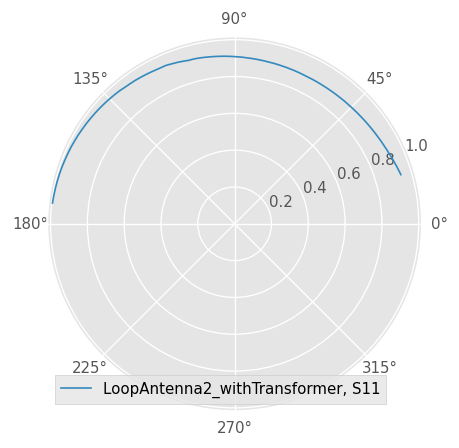

In [72]:
Loop2A.plot_s_polar()

In [73]:
index = 1
print(Loop2A.f[index], ' ', Loop2A.z[index], ' ', Loop2A.y[index])

695000.0   [[0.14823254+3.88075827j]]   [[0.00982827-0.25730619j]]


$s_{11} = {a_{1}\over{b_{1}}} $ <br> 
$ a_{1} = {E_{1,incident}\over{Z_{0}}}$ <br>
$ b_{1} = {E_{1,reflected}\over{Z_{0}}}$ <br>

In [74]:
# can we calculate the values directly from the s values. 
index = 0
s = Loop2A.s[index]
f = Loop2A.f[index]
Z0 = 50.0
Z = Loop2A.z[index]
# s11 is defined as b1/a1 where

Zcalc = (1+s)/(1-s) * Z0
print('Zcalc: ', Zcalc)

Zcalc:  [[0.10589821+2.83699413j]]


1-Port Network: 'LoopAntenna2without',  500000.0-20000000.0 Hz, 101 pts, z0=[50.+0.j]


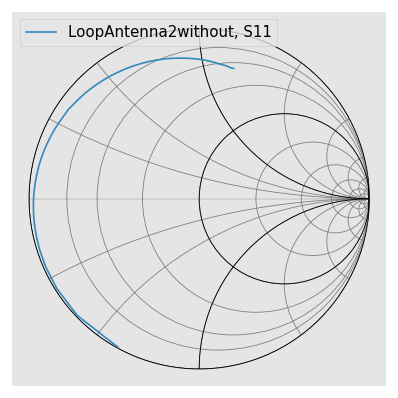

In [75]:
# Small loop raw
Loop2B = Network('Antenna/LoopAntenna2without.s1p')
print(Loop2B)
Loop2B.plot_s_smith()

The big loop is composed of a hoop of 23.125 inches in diameter with 15 turns of #22 wire on it. <br> 
Calculated values: <br> 
Inductance: 277uH <br>
<br>
This should easily tune the BC band. <br>
<table>
    <tr>
        <th> Capacitor </th>
        <th> Frequency </th>
        <th> Impedance </th>
    </tr>
    <tr>
        <td> 365pF </td>
        <td> 0.5MHz</td>
        <td> 871 ohms </td>
    </tr>
    <tr>
        <td> 20pF </td>
        <td> 2.8MHz </td>
        <td> 3720 ohms </td> 
    </tr>
</table>

1-Port Network: 'LoopAntenna1',  500000.0-20000000.0 Hz, 101 pts, z0=[50.+0.j]  L @ F:  500000.0   [[753.31068817]]  uH


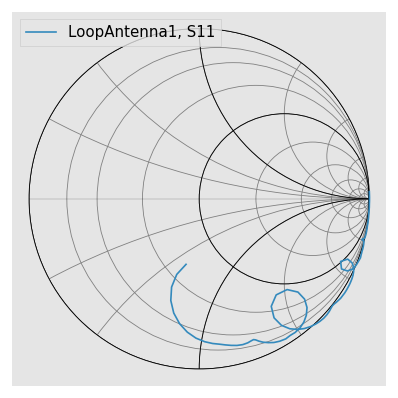

In [76]:
# Big loop Raw
Loop1A = Network('Antenna/LoopAntenna1.s1p')
index = 0
print(Loop1A, ' L @ F: ', Loop1A.f[index], ' ', Inductance(Loop1A.f[index], Loop1A.z[index])*1.0e6, ' uH')
Loop1A.plot_s_smith()

Something looks dreadfully wrong about this. 

1-Port Network: 'BigLoop365',  500000.0-20000000.0 Hz, 101 pts, z0=[50.+0.j]  L @ F:  500000.0   [[6.06099835e-07]]


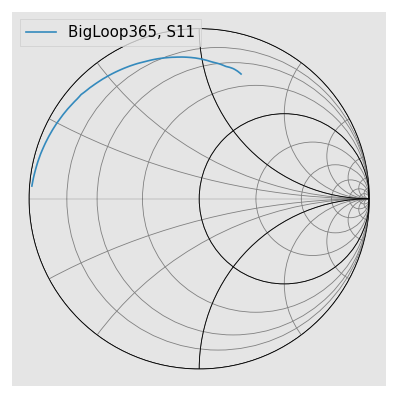

In [77]:
# Big Loop at 365pf in parallel
Loop1B = Network('Antenna/BigLoop365.s1p')
index = 0
print(Loop1B, ' L @ F: ', Loop1B.f[index], ' ', Inductance(Loop1B.f[index], Loop1B.z[index]))
Loop1B.plot_s_smith()

1-Port Network: 'BigLoop20pF',  500000.0-20000000.0 Hz, 101 pts, z0=[50.+0.j]  L @ F:  500000.0   [[6.07267621e-07]]


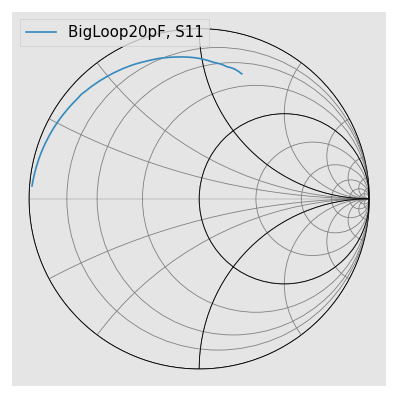

In [78]:
# Big Loop at 20pf in parallel
Loop1C = Network('Antenna/BigLoop20pF.s1p')
index = 0
print(Loop1C, ' L @ F: ', Loop1C.f[index], ' ', Inductance(Loop1C.f[index], Loop1C.z[index]))
Loop1C.plot_s_smith()

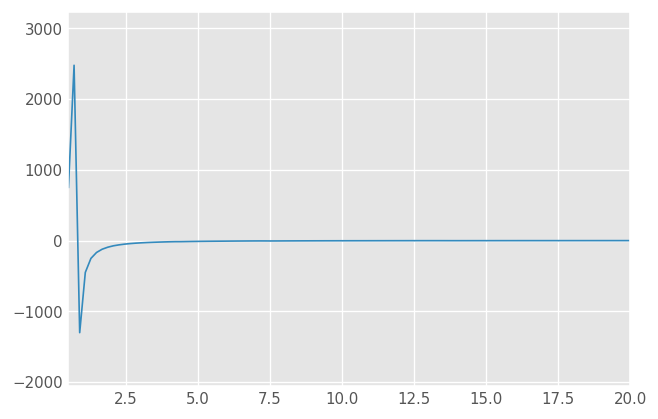

In [147]:
f = Loop1A.f
L = Inductance(f,Loop1A.z)*1.0e6
#z = Loop1A.z
#Z_imag = np.imag(z)
#print(Z_imag.size)
#X = Z_imag.reshape(Z_imag.size)
#print(X)
#np.shape(z)
#zr = z.reshape(101)
plt.plot(f*1.0e-6,L)

In [153]:
index = 4
print('F: ', f[index], ' L: ', L[index], ' uH')

F:  1280000.0  L:  -251.63256645368398  uH


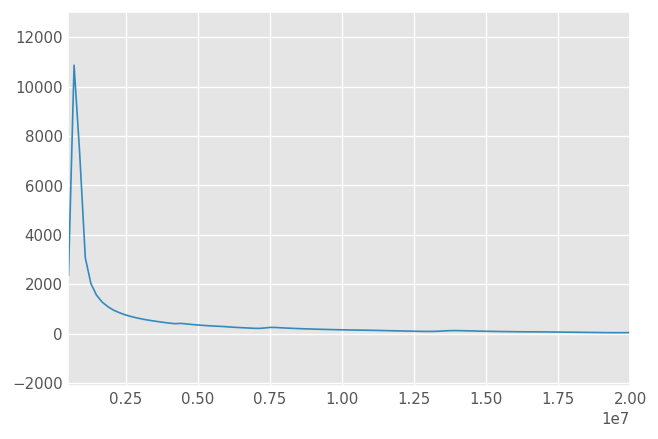

In [157]:
mag = Loop1A.z_mag
y = mag.reshape(mag.size)
plt.plot(f,y)

In [163]:
index = 4
print('freq: ', f[index], ' mag(Z): ', y[index])

freq:  1280000.0  mag(Z):  2024.0195074079597
